In [123]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [124]:
df = pd.read_csv('billboard_top_rap&notrap_albums_lyrics_moral_profanity_emotion_sentiment_scores_clean4.csv')
df = df.loc[:,~df.columns.str.match("Unnamed")]
df = df.rename(columns={"moral_nonmoral_ratio.1": "moral_nonmoral_ratio_vv"})

# Variables

Variables to use
- Morality: using eMFD, we have extracted the proability of the lyrics expressing either upholding or violating each of the five moral foundations 

['care.virtue', 'fairness.virtue', 'loyalty.virtue',
       'authority.virtue', 'sanctity.virtue', 'care.vice', 'fairness.vice',
       'loyalty.vice', 'authority.vice', 'sanctity.vice', 'moral_nonmoral_ratio_vv']

- Sentiment: sentiment is calculated using both NRCLex and Vader

[NRC >> 'positive', 'negative']
[VADER >> 'vad_neg', 'vad_pos', 'vad_neu','vad_compound']

- Emotion: emotion is calculated using NRCLEx

['anger', 'anticipation', 'disgust', 'fear', 'joy','sadness', 'surprise', 'trust',]

- Profanity: proportion of profanity words in lyrics

['profanity_prop']

- year on billboard: the year the song was on billboard

['year_billboard']

- category: whether the song is a rap or not rap

['category']

-name of the artists

['artist']

-name of the album

['title_album']

# Factor Analysis 

# Descriptive Statistics

##### Find the number of rap albums and non rap albums.
group by 'title_album'
IV: 'category'
DV: frequency of albums

##### Find the number of rap songs and non rap song.
IV: 'category'
DV: frequency of tracks

##### Find the average tracks in each songs for rap and non rap songs
group by 'title_album'
IV: 'category'
DV: mean and standard deviation of number of tracks per albums

##### Correlation between measurements
pearson-correlation for all the variables listed above
-make a heatmap
-have the correlation coefficent shown on the heatmap

## Visualization

In [125]:
rap_type=df["category"]
grouped = df.groupby(rap_type)
listby_not_rap = grouped.get_group("not_rap")
rap_type=df["category"]
grouped = df.groupby(rap_type)
listby_rap = grouped.get_group("rap")

probabilities = ['care_p','fairness_p','loyalty_p','authority_p','sanctity_p']
foundations = ['care.virtue','care.vice','fairness.virtue','fairness.vice','loyalty.virtue','loyalty.vice',
               'authority.virtue','authority.vice','sanctity.virtue','sanctity.vice']
emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy','sadness', 'surprise', 'trust']

### Profanity
Rap music includes more profanity than non rap music

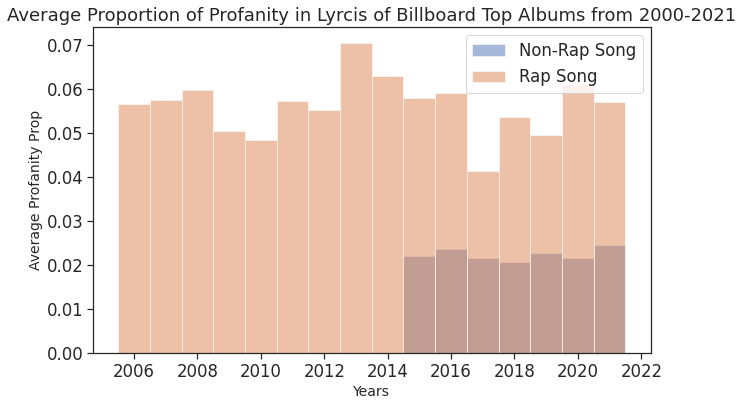

In [126]:
# "Average Profanity Prop for Rap and Not_Rap Comparison from 2000-2021"

listby_not_rap_avg_profanity_prop=listby_not_rap.groupby(['year_billboard'],as_index=False).profanity_prop.mean()
listby_rap_avg_profanity_prop=listby_rap.groupby(['year_billboard'],as_index=False).profanity_prop.mean()

plt.figure(figsize=(10,6))
plt.xlabel("Years", size=14)
plt.ylabel("Average Profanity Prop", size=14)
plt.title("Average Proportion of Profanity in Lyrcis of Billboard Top Albums from 2000-2021")
plt.bar(listby_not_rap_avg_profanity_prop['year_billboard'], listby_not_rap_avg_profanity_prop['profanity_prop'], alpha=0.5, width = 1, label="Non-Rap Song")
plt.bar(listby_rap_avg_profanity_prop['year_billboard'], listby_rap_avg_profanity_prop['profanity_prop'], alpha=0.5, width = 1, label="Rap Song")

plt.legend(loc='upper right')
#plt.savefig("overlapping_histograms_with_matplotlib_Python.png")
plt.show()

## Morality
Moral signals have decreased over time for Rap music

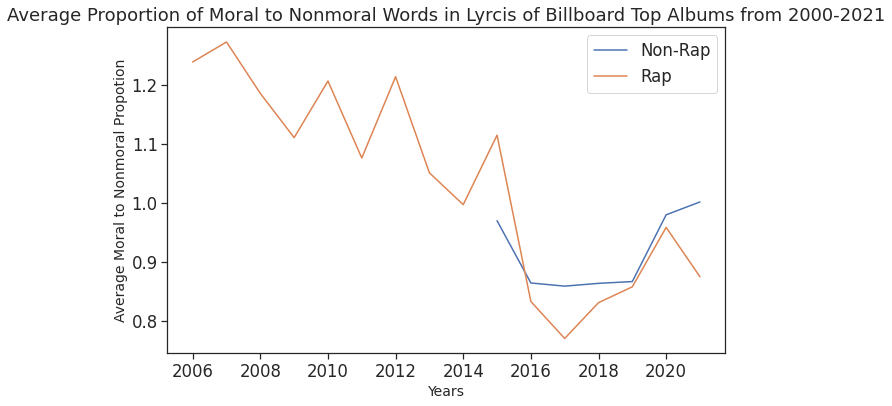

In [127]:
listby_not_rap_avg=listby_not_rap.groupby(['year_billboard'],as_index=False).moral_nonmoral_ratio_vv.mean()
listby_rap_avg=listby_rap.groupby(['year_billboard'],as_index=False).moral_nonmoral_ratio_vv.mean()

plt.figure(figsize=(10,6))
plt.xlabel("Years", size=14)
plt.ylabel("Average Moral to Nonmoral Propotion", size=14)
plt.title("Average Proportion of Moral to Nonmoral Words in Lyrcis of Billboard Top Albums from 2000-2021")
plt.plot(listby_not_rap_avg['year_billboard'], listby_not_rap_avg['moral_nonmoral_ratio_vv'], label = "Non-Rap")
plt.plot(listby_rap_avg['year_billboard'], listby_rap_avg['moral_nonmoral_ratio_vv'], label = "Rap")
plt.legend()
plt.show()

In [128]:
emfd_f = pd.melt(df[probabilities])
emfd_s = pd.melt(pd.DataFrame(df[probabilities+['category']]), id_vars='category')['category']
emfd_source = emfd_f.join(emfd_s, rsuffix='_source')

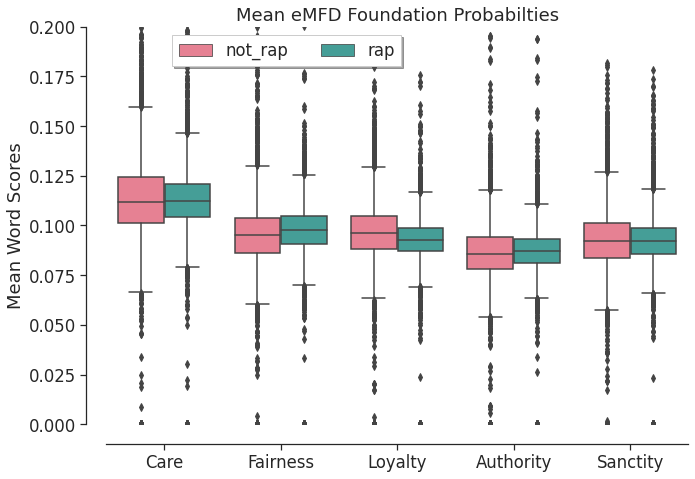

In [129]:
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10,7))
g = sns.boxplot(x='variable', y='value', hue='category', data = emfd_source, palette='husl')
sns.despine(offset=20, trim=False)
ax.legend(loc='upper left', bbox_to_anchor=(0.1, 1),
          ncol=4, fancybox=False, shadow=True)
g.set_xticklabels(['Care','Fairness','Loyalty','Authority','Sanctity'])
g.set_ylim(bottom=0,top=0.2)
g.set_title('Mean eMFD Foundation Probabilties')
g.set_ylabel('Mean Word Scores')
g.set_xlabel('')
plt.tight_layout()

In [130]:
emfd_f = pd.melt(df[foundations])
emfd_s = pd.melt(pd.DataFrame(df[foundations+['category']]), id_vars='category')['category']
emfd_source = emfd_f.join(emfd_s, rsuffix='_source')

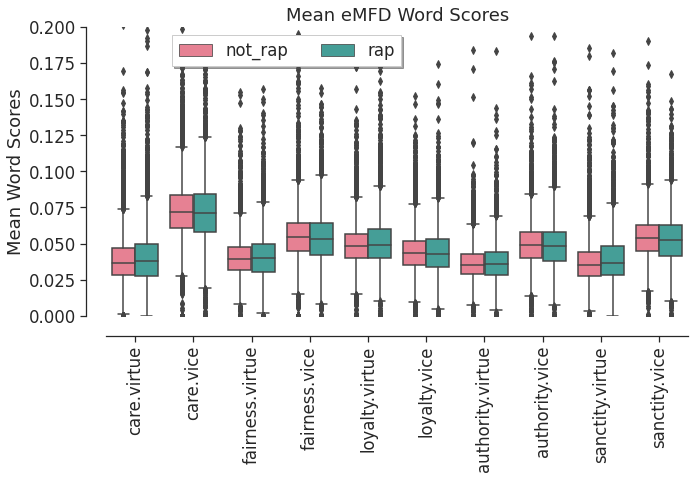

In [131]:
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10,7))
g = sns.boxplot(x='variable', y='value', hue='category', data = emfd_source, palette='husl')
sns.despine(offset=20, trim=False)
ax.legend(loc='upper left', bbox_to_anchor=(0.1, 1),
          ncol=4, fancybox=False, shadow=True)
g.set_xticklabels(foundations, rotation = 90)
g.set_ylim(bottom=0,top=0.2)
g.set_title('Mean eMFD Word Scores')
g.set_ylabel('Mean Word Scores')
g.set_xlabel('')
plt.tight_layout()

# Sentiment
For non rap, lyrics have more positive sentiment than negative sentiment.

For rap, lyrics have more negative sentiment than positive sentiment.

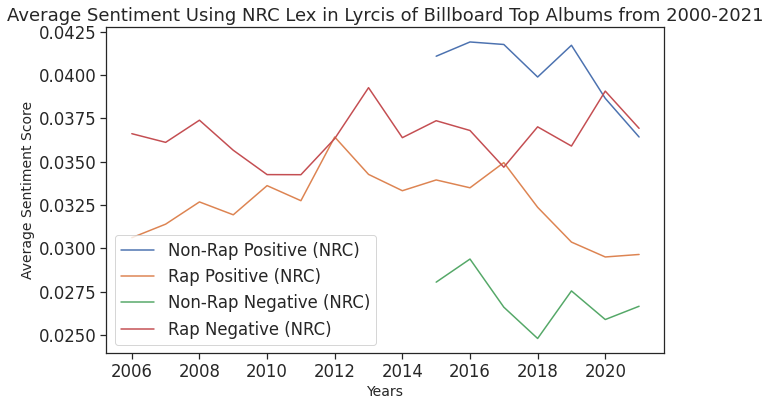

In [132]:
# Sentiment

not_rap_positive=listby_not_rap.groupby(['year_billboard'],as_index=False).positive.mean()
rap_positive=listby_rap.groupby(['year_billboard'],as_index=False).positive.mean()

not_rap_negative=listby_not_rap.groupby(['year_billboard'],as_index=False).negative.mean()
rap_negative=listby_rap.groupby(['year_billboard'],as_index=False).negative.mean()

plt.figure(figsize=(10,6))
plt.xlabel("Years", size=14)
plt.ylabel("Average Sentiment Score", size=14)
plt.title("Average Sentiment Using NRC Lex in Lyrcis of Billboard Top Albums from 2000-2021")
plt.plot(not_rap_positive['year_billboard'], not_rap_positive['positive'], label = "Non-Rap Positive (NRC)")
plt.plot(rap_positive['year_billboard'], rap_positive['positive'], label = "Rap Positive (NRC)")
plt.plot(not_rap_negative['year_billboard'], not_rap_negative['negative'], label = "Non-Rap Negative (NRC)")
plt.plot(rap_negative['year_billboard'], rap_negative['negative'], label = "Rap Negative (NRC)")

plt.legend()
plt.show()

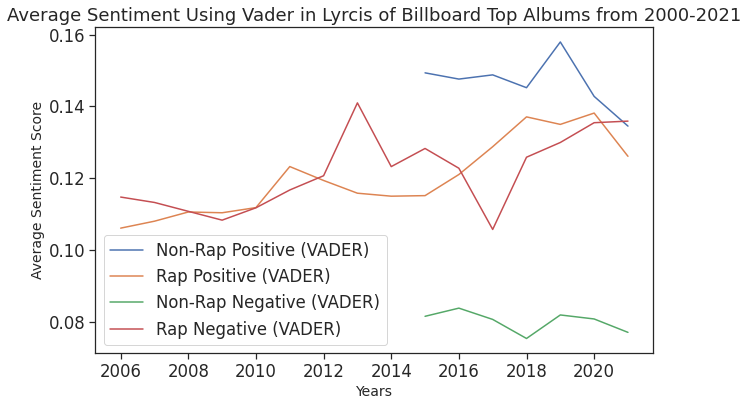

In [133]:
# Sentiment
not_rap_vad_pos=listby_not_rap.groupby(['year_billboard'],as_index=False).vad_pos.mean()
rap_vad_pos=listby_rap.groupby(['year_billboard'],as_index=False).vad_pos.mean()


not_rap_vad_neg=listby_not_rap.groupby(['year_billboard'],as_index=False).vad_neg.mean()
rap_vad_neg=listby_rap.groupby(['year_billboard'],as_index=False).vad_neg.mean()

plt.figure(figsize=(10,6))
plt.xlabel("Years", size=14)
plt.ylabel("Average Sentiment Score", size=14)
plt.title("Average Sentiment Using Vader in Lyrcis of Billboard Top Albums from 2000-2021")


plt.plot(not_rap_vad_pos['year_billboard'], not_rap_vad_pos['vad_pos'], label = "Non-Rap Positive (VADER)")
plt.plot(rap_vad_pos['year_billboard'], rap_vad_pos['vad_pos'], label = "Rap Positive (VADER)")
plt.plot(not_rap_vad_neg['year_billboard'], not_rap_vad_neg['vad_neg'], label = "Non-Rap Negative (VADER)")
plt.plot(rap_vad_neg['year_billboard'], rap_vad_neg['vad_neg'], label = "Rap Negative (VADER)")
plt.legend()
plt.show()

### Emotion

In [134]:
emfd_f = pd.melt(df[emotion])
emfd_s = pd.melt(pd.DataFrame(df[emotion+['category']]), id_vars='category')['category']
emfd_source = emfd_f.join(emfd_s, rsuffix='_source')

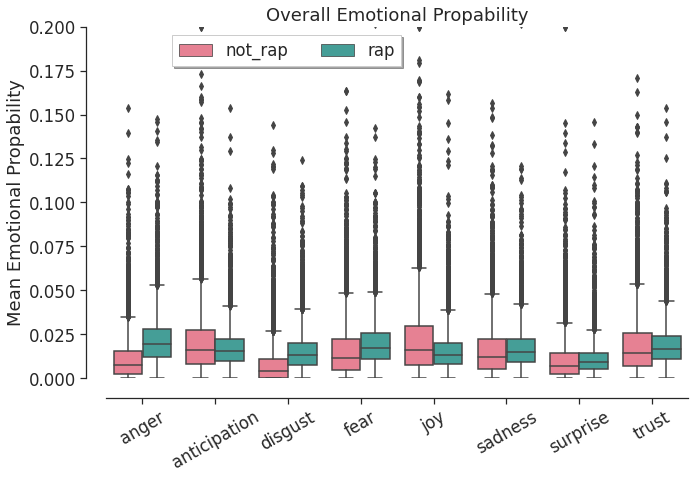

In [135]:
sns.set(font_scale=1.5)
sns.set_style('white')
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10,7))
g = sns.boxplot(x='variable', y='value', hue='category', data = emfd_source, palette='husl')
sns.despine(offset=20, trim=False)
ax.legend(loc='upper left', bbox_to_anchor=(0.1, 1),
          ncol=4, fancybox=False, shadow=True)
g.set_xticklabels(emotion, rotation = 30)
g.set_ylim(bottom=0,top=0.2)
g.set_title('Overall Emotional Propability')
g.set_ylabel('Mean Emotional Propability')
g.set_xlabel('')
plt.tight_layout()

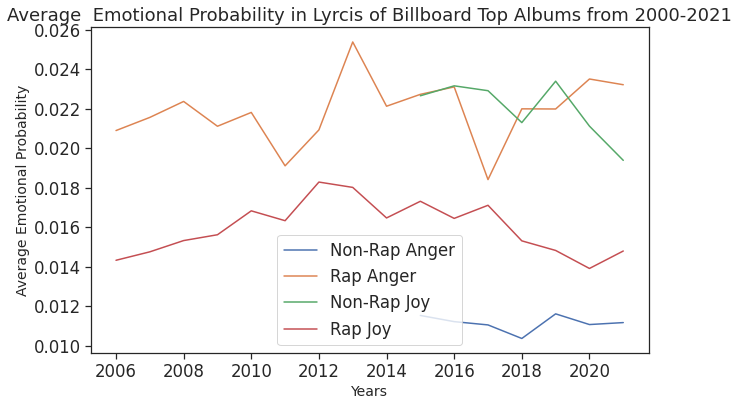

In [136]:
# Emotion
not_rap_anger=listby_not_rap.groupby(['year_billboard'],as_index=False).anger.mean()
rap_vad_anger=listby_rap.groupby(['year_billboard'],as_index=False).anger.mean()

not_rap_joy=listby_not_rap.groupby(['year_billboard'],as_index=False).joy.mean()
rap_vad_joy=listby_rap.groupby(['year_billboard'],as_index=False).joy.mean()

plt.figure(figsize=(10,6))
plt.xlabel("Years", size=14)
plt.ylabel("Average Emotional Probability", size=14)
plt.title("Average  Emotional Probability in Lyrcis of Billboard Top Albums from 2000-2021")

plt.plot(not_rap_anger['year_billboard'], not_rap_anger['anger'], label = "Non-Rap Anger")
plt.plot(rap_vad_anger['year_billboard'], rap_vad_anger['anger'], label = "Rap Anger")

plt.plot(not_rap_joy['year_billboard'], not_rap_joy['joy'], label = "Non-Rap Joy")
plt.plot(rap_vad_joy['year_billboard'], rap_vad_joy['joy'], label = "Rap Joy")

plt.legend()
plt.show()

# Inferential Statistics

In [137]:
from scipy import stats
from math import sqrt

## Profanity
On average, rap music contains more profanity than non rap music

In [138]:
# t-test for profanity
print(df[['category', 'profanity_prop']].groupby(['category']).describe())

         profanity_prop                                                    \
                  count      mean       std       min       25%       50%   
category                                                                    
not_rap          6250.0  0.022421  0.033286  0.001883  0.007463  0.012048   
rap              5455.0  0.055744  0.047649  0.002119  0.025540  0.046025   

                         
               75%  max  
category                 
not_rap   0.025000  0.5  
rap       0.073579  0.5  


In [139]:
RAP = df[['category', 'profanity_prop']].groupby(['category']).get_group('rap')['profanity_prop']
NOT_RAP = df[['category', 'profanity_prop']].groupby(['category']).get_group('not_rap')['profanity_prop']

F, p = stats.levene(RAP,NOT_RAP, center='mean')

print("Levene's Test F-value is:", str(F))
print("Levene's Test p-value is:", str(p))

Levene's Test F-value is: 582.6784469902947
Levene's Test p-value is: 1.1246757747566827e-125


In [140]:
t, p = stats.ttest_ind(RAP,NOT_RAP)

print("independent t-test t-value is:", str(t))
print("independent t-test p-value is:", float(p), "(two-sided)")

independent t-test t-value is: 44.277967875172486
independent t-test p-value is: 0.0 (two-sided)


In [141]:
## 